
**Loading required libraries**

In [62]:
%pip install plotnine
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\pawel\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\pawel\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\pawel\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, GradientBoostingClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Loading source datasets and data preprocessing**

In [3]:
old_season_cols = ["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","PSH","PSD","PSA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"]
bundes_new_season_cols = ["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","AvgH","AvgD","AvgA","AvgC>2.5","AvgC<2.5"]
laliga_new_season_cols = ["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","AvgH","AvgD","AvgA","Avg>2.5","Avg<2.5"]
seriea_new_season_cols = ["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","AvgH","AvgD","AvgA","Avg>2.5","Avg<2.5"]
pl_new_season_cols = ["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","AvgH","AvgD","AvgA","Avg>2.5","Avg<2.5"]

'''Bundesliga'''
bundes_1011 = pd.read_csv('./data/preprocessing/bundesliga/bundes10-11.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
bundes_1112 = pd.read_csv('./data/preprocessing/bundesliga/bundes11-12.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
bundes_1213 = pd.read_csv('./data/preprocessing/bundesliga/bundes12-13.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
bundes_1314 = pd.read_csv('./data/preprocessing/bundesliga/bundes13-14.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
bundes_1415 = pd.read_csv('./data/preprocessing/bundesliga/bundes14-15.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
bundes_1516 = pd.read_csv('./data/preprocessing/bundesliga/bundes15-16.csv', usecols=old_season_cols)
bundes_1617 = pd.read_csv('./data/preprocessing/bundesliga/bundes16-17.csv', usecols=old_season_cols)
bundes_1718 = pd.read_csv('./data/preprocessing/bundesliga/bundes17-18.csv', usecols=old_season_cols)
bundes_1819 = pd.read_csv('./data/preprocessing/bundesliga/bundes18-19.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","PSH","PSD","PSA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])

bundes_1920 = pd.read_csv('./data/preprocessing/bundesliga/bundes19-20.csv', usecols=bundes_new_season_cols)
bundes_2021 = pd.read_csv('./data/preprocessing/bundesliga/bundes20-21.csv', usecols=bundes_new_season_cols)
bundes_2122 = pd.read_csv('./data/preprocessing/bundesliga/bundes21-22.csv', usecols=bundes_new_season_cols)
bundes_2223 = pd.read_csv('./data/preprocessing/bundesliga/bundes22-23.csv', usecols=bundes_new_season_cols)

'''Laliga'''
laliga_1011 = pd.read_csv('./data/preprocessing/laliga/laliga10-11.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
laliga_1112 = pd.read_csv('./data/preprocessing/laliga/laliga11-12.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
laliga_1213 = pd.read_csv('./data/preprocessing/laliga/laliga12-13.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
laliga_1314 = pd.read_csv('./data/preprocessing/laliga/laliga13-14.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
laliga_1415 = pd.read_csv('./data/preprocessing/laliga/laliga14-15.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
laliga_1516 = pd.read_csv('./data/preprocessing/laliga/laliga15-16.csv', usecols=old_season_cols)
laliga_1617 = pd.read_csv('./data/preprocessing/laliga/laliga16-17.csv', usecols=old_season_cols)
laliga_1718 = pd.read_csv('./data/preprocessing/laliga/laliga17-18.csv', usecols=old_season_cols)
laliga_1819 = pd.read_csv('./data/preprocessing/laliga/laliga18-19.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","PSH","PSD","PSA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
laliga_1920 = pd.read_csv('./data/preprocessing/bundesliga/bundes19-20.csv', usecols=laliga_new_season_cols)
laliga_2021 = pd.read_csv('./data/preprocessing/bundesliga/bundes20-21.csv', usecols=laliga_new_season_cols)
laliga_2122 = pd.read_csv('./data/preprocessing/bundesliga/bundes21-22.csv', usecols=laliga_new_season_cols)
laliga_2223 = pd.read_csv('./data/preprocessing/bundesliga/bundes22-23.csv', usecols=laliga_new_season_cols)


'''Serie A'''
seriea_1011 = pd.read_csv('./data/preprocessing/seriea/seriea10-11.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
seriea_1112 = pd.read_csv('./data/preprocessing/seriea/seriea11-12.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
seriea_1213 = pd.read_csv('./data/preprocessing/seriea/seriea12-13.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
seriea_1314 = pd.read_csv('./data/preprocessing/seriea/seriea13-14.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
seriea_1415 = pd.read_csv('./data/preprocessing/seriea/seriea14-15.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
seriea_1516 = pd.read_csv('./data/preprocessing/seriea/seriea15-16.csv', usecols=old_season_cols)
seriea_1617 = pd.read_csv('./data/preprocessing/seriea/seriea16-17.csv', usecols=old_season_cols)
seriea_1718 = pd.read_csv('./data/preprocessing/seriea/seriea17-18.csv', usecols=old_season_cols)
seriea_1819 = pd.read_csv('./data/preprocessing/seriea/seriea18-19.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","PSH","PSD","PSA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
seriea_1920 = pd.read_csv('./data/preprocessing/seriea/seriea19-20.csv', usecols=seriea_new_season_cols)
seriea_2021 = pd.read_csv('./data/preprocessing/seriea/seriea20-21.csv', usecols=seriea_new_season_cols)
seriea_2122 = pd.read_csv('./data/preprocessing/seriea/seriea21-22.csv', usecols=seriea_new_season_cols)
seriea_2223 = pd.read_csv('./data/preprocessing/seriea/seriea22-23.csv', usecols=seriea_new_season_cols)


'''Premier League'''
pl_1011 = pd.read_csv('./data/preprocessing/premierleague/premierleague10-11.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
pl_1112 = pd.read_csv('./data/preprocessing/premierleague/premierleague11-12.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
pl_1213 = pd.read_csv('./data/preprocessing/premierleague/premierleague12-13.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
pl_1314 = pd.read_csv('./data/preprocessing/premierleague/premierleague13-14.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
pl_1415 = pd.read_csv('./data/preprocessing/premierleague/premierleague14-15.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
pl_1516 = pd.read_csv('./data/preprocessing/premierleague/premierleague15-16.csv', usecols=old_season_cols)
pl_1617 = pd.read_csv('./data/preprocessing/premierleague/premierleague16-17.csv', usecols=old_season_cols)
pl_1718 = pd.read_csv('./data/preprocessing/premierleague/premierleague17-18.csv', usecols=old_season_cols)
pl_1819 = pd.read_csv('./data/preprocessing/premierleague/premierleague18-19.csv', usecols=["Div","Date", "HomeTeam", "AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR", 
        "B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","PSH","PSD","PSA","WHH","WHD","WHA","VCH","VCD","VCA", "BbAvH", "BbAvD", "BbAvA",
        "BbAv>2.5","BbAv<2.5"])
pl_1920 = pd.read_csv('./data/preprocessing/premierleague/premierleague19-20.csv', usecols=pl_new_season_cols)
pl_2021 = pd.read_csv('./data/preprocessing/premierleague/premierleague20-21.csv', usecols=pl_new_season_cols)
pl_2122 = pd.read_csv('./data/preprocessing/premierleague/premierleague21-22.csv', usecols=pl_new_season_cols)
pl_2223 = pd.read_csv('./data/preprocessing/premierleague/premierleague22-23.csv', usecols=pl_new_season_cols)

Variables sampling, data transforming etc.

In [4]:
'''Bundesliga matches statistics datasets preprocessing'''

df_1 = [bundes_1011, bundes_1112, bundes_1213, bundes_1314, bundes_1415]

columnsH_1 = ['B365H', 'BWH', 'IWH', 'LBH', 'WHH', 'VCH', 'BbAvH']
columnsA_1 = ['B365A', 'BWA', 'IWA', 'LBA', 'WHA', 'VCA', 'BbAvA']
columnsD_1 = ['B365D', 'BWD', 'IWD', 'LBD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(df_1):
    df_1[i]['AvgH'] = df_1[i][columnsH_1].mean(axis=1)
    df_1[i]['AvgA'] = df_1[i][columnsA_1].mean(axis=1)
    df_1[i]['AvgD'] = df_1[i][columnsD_1].mean(axis=1)
    df_1[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    df_1[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    df_1[i].drop(columnsH_1, inplace=True, axis=1)
    df_1[i].drop(columnsA_1, inplace=True, axis=1)
    df_1[i].drop(columnsD_1, inplace=True, axis=1)


datasets = [bundes_1516, bundes_1617, bundes_1718]

columnsH = ['B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'VCH', 'BbAvH']
columnsA = ['B365A', 'BWA', 'IWA', 'LBA', 'PSA', 'WHA', 'VCA', 'BbAvA']
columnsD = ['B365D', 'BWD', 'IWD', 'LBD', 'PSD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(datasets):
    datasets[i]['AvgH'] = datasets[i][columnsH].mean(axis=1)
    datasets[i]['AvgA'] = datasets[i][columnsA].mean(axis=1)
    datasets[i]['AvgD'] = datasets[i][columnsD].mean(axis=1)
    datasets[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    datasets[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    datasets[i].drop(columnsH, inplace=True, axis=1)
    datasets[i].drop(columnsA, inplace=True, axis=1)
    datasets[i].drop(columnsD, inplace=True, axis=1)

bundes_1819['AvgH'] = bundes_1819[['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH']].mean(axis=1)
bundes_1819['AvgA'] = bundes_1819[['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA']].mean(axis=1)
bundes_1819['AvgD'] = bundes_1819[['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD']].mean(axis=1)
bundes_1819.drop(['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH'], inplace=True, axis=1)
bundes_1819.drop(['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA'], inplace=True, axis=1)
bundes_1819.drop(['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD'], inplace=True, axis=1)
bundes_1819.rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
bundes_1819.rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)


datasets = [bundes_1920, bundes_2021, bundes_2122, bundes_2223]

for i, ds in enumerate(datasets):
    datasets[i].rename(columns={"AvgC>2.5": "Avg>2.5"},inplace = True)
    datasets[i].rename(columns={"AvgC<2.5": "Avg<2.5"},inplace = True)

In [5]:
'''LaLiga matches statistics datasets preprocessing'''

df_1 = [laliga_1011, laliga_1112, laliga_1213, laliga_1314, laliga_1415]

columnsH_1 = ['B365H', 'BWH', 'IWH', 'LBH', 'WHH', 'VCH', 'BbAvH']
columnsA_1 = ['B365A', 'BWA', 'IWA', 'LBA', 'WHA', 'VCA', 'BbAvA']
columnsD_1 = ['B365D', 'BWD', 'IWD', 'LBD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(df_1):
    df_1[i]['AvgH'] = df_1[i][columnsH_1].mean(axis=1)
    df_1[i]['AvgA'] = df_1[i][columnsA_1].mean(axis=1)
    df_1[i]['AvgD'] = df_1[i][columnsD_1].mean(axis=1)
    df_1[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    df_1[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    df_1[i].drop(columnsH_1, inplace=True, axis=1)
    df_1[i].drop(columnsA_1, inplace=True, axis=1)
    df_1[i].drop(columnsD_1, inplace=True, axis=1)

datasets = [laliga_1516, laliga_1617, laliga_1718]

columnsH = ['B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'VCH', 'BbAvH']
columnsA = ['B365A', 'BWA', 'IWA', 'LBA', 'PSA', 'WHA', 'VCA', 'BbAvA']
columnsD = ['B365D', 'BWD', 'IWD', 'LBD', 'PSD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(datasets):
    datasets[i]['AvgH'] = datasets[i][columnsH].mean(axis=1)
    datasets[i]['AvgA'] = datasets[i][columnsA].mean(axis=1)
    datasets[i]['AvgD'] = datasets[i][columnsD].mean(axis=1)
    datasets[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    datasets[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    datasets[i].drop(columnsH, inplace=True, axis=1)
    datasets[i].drop(columnsA, inplace=True, axis=1)
    datasets[i].drop(columnsD, inplace=True, axis=1)

laliga_1819['AvgH'] = laliga_1819[['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH']].mean(axis=1)
laliga_1819['AvgA'] = laliga_1819[['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA']].mean(axis=1)
laliga_1819['AvgD'] = laliga_1819[['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD']].mean(axis=1)
laliga_1819.drop(['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH'], inplace=True, axis=1)
laliga_1819.drop(['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA'], inplace=True, axis=1)
laliga_1819.drop(['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD'], inplace=True, axis=1)
laliga_1819.rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
laliga_1819.rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)

In [6]:
'''SerieA matches statistics datasets preprocessing'''

df_1 = [seriea_1011, seriea_1112, seriea_1213, seriea_1314, seriea_1415]

columnsH_1 = ['B365H', 'BWH', 'IWH', 'LBH', 'WHH', 'VCH', 'BbAvH']
columnsA_1 = ['B365A', 'BWA', 'IWA', 'LBA', 'WHA', 'VCA', 'BbAvA']
columnsD_1 = ['B365D', 'BWD', 'IWD', 'LBD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(df_1):
    df_1[i]['AvgH'] = df_1[i][columnsH_1].mean(axis=1)
    df_1[i]['AvgA'] = df_1[i][columnsA_1].mean(axis=1)
    df_1[i]['AvgD'] = df_1[i][columnsD_1].mean(axis=1)
    df_1[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    df_1[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    df_1[i].drop(columnsH_1, inplace=True, axis=1)
    df_1[i].drop(columnsA_1, inplace=True, axis=1)
    df_1[i].drop(columnsD_1, inplace=True, axis=1)

datasets = [seriea_1516, seriea_1617, seriea_1718]

columnsH = ['B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'VCH', 'BbAvH']
columnsA = ['B365A', 'BWA', 'IWA', 'LBA', 'PSA', 'WHA', 'VCA', 'BbAvA']
columnsD = ['B365D', 'BWD', 'IWD', 'LBD', 'PSD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(datasets):
    datasets[i]['AvgH'] = datasets[i][columnsH].mean(axis=1)
    datasets[i]['AvgA'] = datasets[i][columnsA].mean(axis=1)
    datasets[i]['AvgD'] = datasets[i][columnsD].mean(axis=1)
    datasets[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    datasets[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    datasets[i].drop(columnsH, inplace=True, axis=1)
    datasets[i].drop(columnsA, inplace=True, axis=1)
    datasets[i].drop(columnsD, inplace=True, axis=1)

seriea_1819['AvgH'] = seriea_1819[['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH']].mean(axis=1)
seriea_1819['AvgA'] = seriea_1819[['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA']].mean(axis=1)
seriea_1819['AvgD'] = seriea_1819[['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD']].mean(axis=1)
seriea_1819.drop(['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH'], inplace=True, axis=1)
seriea_1819.drop(['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA'], inplace=True, axis=1)
seriea_1819.drop(['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD'], inplace=True, axis=1)
seriea_1819.rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
seriea_1819.rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)

In [7]:
'''Premier League matches statistics datasets preprocessing'''

df_1 = [pl_1011, pl_1112, pl_1213, pl_1314, pl_1415]

columnsH_1 = ['B365H', 'BWH', 'IWH', 'LBH', 'WHH', 'VCH', 'BbAvH']
columnsA_1 = ['B365A', 'BWA', 'IWA', 'LBA', 'WHA', 'VCA', 'BbAvA']
columnsD_1 = ['B365D', 'BWD', 'IWD', 'LBD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(df_1):
    df_1[i]['AvgH'] = df_1[i][columnsH_1].mean(axis=1)
    df_1[i]['AvgA'] = df_1[i][columnsA_1].mean(axis=1)
    df_1[i]['AvgD'] = df_1[i][columnsD_1].mean(axis=1)
    df_1[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    df_1[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    df_1[i].drop(columnsH_1, inplace=True, axis=1)
    df_1[i].drop(columnsA_1, inplace=True, axis=1)
    df_1[i].drop(columnsD_1, inplace=True, axis=1)
    
datasets = [pl_1516, pl_1617, pl_1718]

columnsH = ['B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'VCH', 'BbAvH']
columnsA = ['B365A', 'BWA', 'IWA', 'LBA', 'PSA', 'WHA', 'VCA', 'BbAvA']
columnsD = ['B365D', 'BWD', 'IWD', 'LBD', 'PSD', 'WHD', 'VCD', 'BbAvD']

for i, ds in enumerate(datasets):
    datasets[i]['AvgH'] = datasets[i][columnsH].mean(axis=1)
    datasets[i]['AvgA'] = datasets[i][columnsA].mean(axis=1)
    datasets[i]['AvgD'] = datasets[i][columnsD].mean(axis=1)
    datasets[i].rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
    datasets[i].rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)
    datasets[i].drop(columnsH, inplace=True, axis=1)
    datasets[i].drop(columnsA, inplace=True, axis=1)
    datasets[i].drop(columnsD, inplace=True, axis=1)

pl_1819['AvgH'] = pl_1819[['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH']].mean(axis=1)
pl_1819['AvgA'] = pl_1819[['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA']].mean(axis=1)
pl_1819['AvgD'] = pl_1819[['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD']].mean(axis=1)
pl_1819.drop(['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'BbAvH'], inplace=True, axis=1)
pl_1819.drop(['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'BbAvA'], inplace=True, axis=1)
pl_1819.drop(['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'BbAvD'], inplace=True, axis=1)
pl_1819.rename(columns={"BbAv>2.5": "Avg>2.5"},inplace = True)
pl_1819.rename(columns={"BbAv<2.5": "Avg<2.5"},inplace = True)

In [8]:
pl_df = pd.concat([pl_1011, pl_1112, pl_1213, pl_1314, pl_1415, pl_1516, pl_1617,pl_1718, pl_1819, pl_1920, pl_2021, pl_2122, pl_2223])
bundes_df = pd.concat([bundes_1011, bundes_1112, bundes_1213, bundes_1314, bundes_1415, bundes_1516, bundes_1617,bundes_1718, bundes_1819, bundes_1920, bundes_2021, bundes_2122, bundes_2223])
laliga_df = pd.concat([laliga_1011, laliga_1112, laliga_1213, laliga_1314, laliga_1415, laliga_1516, laliga_1617, laliga_1718, laliga_1819, laliga_1920, laliga_2021, laliga_2122, laliga_2223])
seriea_df = pd.concat([seriea_1011, seriea_1112, seriea_1213, seriea_1314, seriea_1415, seriea_1516, seriea_1617, seriea_1718, seriea_1819, seriea_1920, seriea_2021, seriea_2122, seriea_2223])

data = [['Premier League', len(pl_df.index)], ['Bundesliga', len(bundes_df.index)], ['LaLiga', len(laliga_df.index)], ['Serie A', len(seriea_df. index)]]
df = pd.DataFrame(data, columns=['League','Number of games'])
  
df

,League,Number of games
0,Premier League,4847
1,Bundesliga,3906
2,LaLiga,4572
3,Serie A,4845


In [9]:
all_seasons = pd.concat([pl_df,bundes_df,laliga_df,seriea_df])

In [10]:
all_seasons.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AC,HY,AY,HR,AR,Avg>2.5,Avg<2.5,AvgH,AvgA,AvgD
0,E0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,7.0,1.0,2.0,0.0,0.0,2.01,1.75,1.907143,4.141429,3.328571
1,E0,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,3.0,2.0,1.0,0.0,0.0,2.08,1.70,2.840000,2.467143,3.250000
2,E0,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,8.0,1.0,3.0,0.0,0.0,2.09,1.69,2.192857,3.295714,3.258571
3,E0,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,1.0,1.0,0.0,0.0,0.0,1.49,2.49,1.158571,17.352857,6.907143
4,E0,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,6.0,3.0,3.0,1.0,0.0,2.16,1.65,2.140000,3.427143,3.242857


Expanding dataset with new variables

In [11]:
all_seasons['TSRH'] = all_seasons['HST']/all_seasons['HS']
all_seasons['TSRA'] = all_seasons['AST']/all_seasons['AS']

In [12]:
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18170 entries, 0 to 279
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       18164 non-null  object 
 1   Date      18164 non-null  object 
 2   HomeTeam  18164 non-null  object 
 3   AwayTeam  18164 non-null  object 
 4   FTHG      18164 non-null  float64
 5   FTAG      18164 non-null  float64
 6   FTR       18164 non-null  object 
 7   HTHG      18162 non-null  float64
 8   HTAG      18162 non-null  float64
 9   HTR       18162 non-null  object 
 10  HS        18163 non-null  float64
 11  AS        18163 non-null  float64
 12  HST       18163 non-null  float64
 13  AST       18163 non-null  float64
 14  HF        18163 non-null  float64
 15  AF        18163 non-null  float64
 16  HC        18163 non-null  float64
 17  AC        18163 non-null  float64
 18  HY        18162 non-null  float64
 19  AY        18163 non-null  float64
 20  HR        18163 non-null  floa

Missing Data analysis

In [13]:
all_seasons.isnull().values.any()

True

In [14]:
all_seasons.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
all_seasons = all_seasons.dropna()

In [16]:
all_seasons.isnull().values.any()

False

In [17]:
all_seasons.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,Avg>2.5,Avg<2.5,AvgH,AvgA,AvgD,TSRH,TSRA
0,E0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,2.0,0.0,0.0,2.01,1.75,1.907143,4.141429,3.328571,0.478261,0.166667
1,E0,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,1.0,0.0,0.0,2.08,1.70,2.840000,2.467143,3.250000,0.285714,0.705882
2,E0,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,3.0,0.0,0.0,2.09,1.69,2.192857,3.295714,3.258571,0.692308,0.583333
3,E0,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,0.0,0.0,0.0,1.49,2.49,1.158571,17.352857,6.907143,0.722222,0.400000
4,E0,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,3.0,1.0,0.0,2.16,1.65,2.140000,3.427143,3.242857,0.333333,0.538462


In [18]:
all_seasons = all_seasons.replace('D1','Germany')
all_seasons = all_seasons.replace('E0','England')
all_seasons = all_seasons.replace('SP1','Spain')
all_seasons = all_seasons.replace('I1','Italy')

In [19]:
print(all_seasons.Div.unique().tolist())

['England', 'Germany', 'Spain', 'Italy']


In [20]:
all_seasons.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,Avg>2.5,Avg<2.5,AvgH,AvgA,AvgD,TSRH,TSRA
0,England,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,2.0,0.0,0.0,2.01,1.75,1.907143,4.141429,3.328571,0.478261,0.166667
1,England,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,1.0,0.0,0.0,2.08,1.70,2.840000,2.467143,3.250000,0.285714,0.705882
2,England,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,3.0,0.0,0.0,2.09,1.69,2.192857,3.295714,3.258571,0.692308,0.583333
3,England,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,0.0,0.0,0.0,1.49,2.49,1.158571,17.352857,6.907143,0.722222,0.400000
4,England,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,3.0,1.0,0.0,2.16,1.65,2.140000,3.427143,3.242857,0.333333,0.538462


In [21]:
all_seasons.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AY,HR,AR,Avg>2.5,Avg<2.5,AvgH,AvgA,AvgD,TSRH,TSRA
count,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,...,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000,18149.000000
mean,1.584826,1.234228,0.702959,0.543501,13.906441,11.345914,5.194997,4.219241,12.876908,13.190809,...,2.169321,0.086341,0.113009,1.824523,2.104208,2.781486,4.695559,4.065549,0.377374,0.375714
std,1.334976,1.186752,0.854710,0.750905,5.276158,4.707784,2.826195,2.490943,4.336676,4.446931,...,1.393937,0.295408,0.338645,0.283532,0.488928,2.048291,4.162458,1.336202,0.162370,0.177941
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.420000,1.380000,1.033333,1.090000,1.400000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,...,1.000000,0.000000,0.000000,1.620000,1.780000,1.670000,2.400000,3.340000,0.266667,0.250000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,13.000000,13.000000,...,2.000000,0.000000,0.000000,1.810000,1.990000,2.172857,3.398571,3.583750,0.366667,0.363636
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,7.000000,6.000000,16.000000,16.000000,...,3.000000,0.000000,0.000000,2.030000,2.270000,2.990000,5.210000,4.210000,0.481481,0.500000
max,10.000000,9.000000,6.000000,6.000000,46.000000,39.000000,24.000000,20.000000,33.000000,32.000000,...,9.000000,3.000000,3.000000,2.910000,6.750000,28.154286,42.338333,19.142500,1.000000,1.125000


**Dataset exploration and visualization**

Variables:

Date (date of game)

In [22]:
all_seasons.Date.describe()

count        18149
unique        2323
top       07/04/12
freq            29
Name: Date, dtype: object

Teams (Home Team and Away Team)

In [23]:
all_seasons.HomeTeam.describe()

count          18149
unique           141
top       Leverkusen
freq             281
Name: HomeTeam, dtype: object

In [24]:
all_seasons.AwayTeam.describe()

count        18149
unique         141
top       Dortmund
freq           283
Name: AwayTeam, dtype: object

Full Time Result

In [25]:
df_ftr = all_seasons['FTR'].value_counts(ascending=True)
df_ftr

D    4439
A    5502
H    8208
Name: FTR, dtype: int64

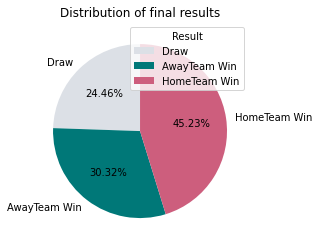

In [26]:
plt.pie(df_ftr, labels = ['Draw','AwayTeam Win','HomeTeam Win'], autopct='%1.2f%%',startangle=90,colors=['#DCE0E6','#007878','#CD5E7D'])
plt.legend(title = "Result")
plt.title('Distribution of final results')
plt.show()

Half-time Result

In [27]:
df_htr = all_seasons['HTR'].value_counts(ascending=True)
df_htr

A    4492
H    6304
D    7353
Name: HTR, dtype: int64

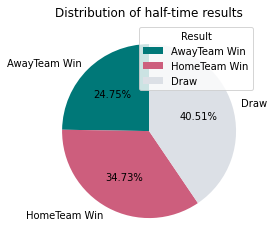

In [28]:
plt.pie(df_htr, labels = ['AwayTeam Win','HomeTeam Win', 'Draw'], autopct='%1.2f%%',startangle=90,colors=['#007878','#CD5E7D','#DCE0E6'])
plt.legend(title = "Result")
plt.title('Distribution of half-time results')
plt.show()

Number of shots by team

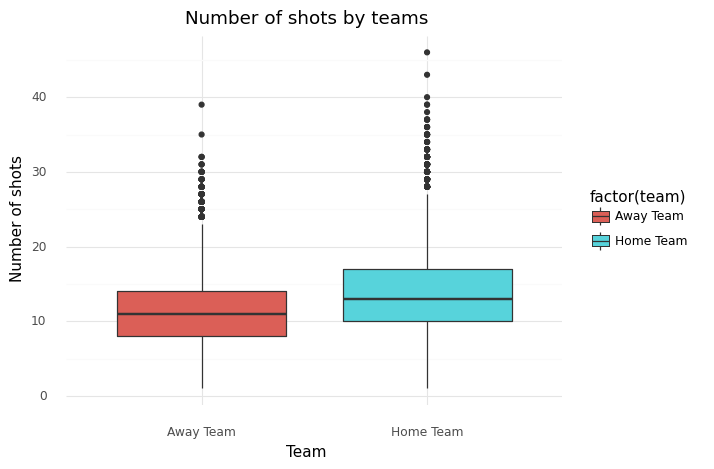

In [29]:
df = all_seasons[['HS','AS']]
shots_df=pd.melt(df)
shots_df.rename(columns = {'variable':'team'}, inplace = True)
shots_df['team'] = shots_df['team'].replace(['HS','AS'], ['Home Team','Away Team'])

print(
    ggplot(shots_df, aes(x = 'team', y = 'value' , fill = 'factor(team)')) +
          geom_boxplot()+
          theme_minimal()+
          labs(title = 'Number of shots by teams', x = 'Team', y = 'Number of shots')
    )


In [30]:
shots_df.groupby(by="team").describe()

value                                                  
             count       mean       std  min   25%   50%   75%   max
team                                                                
Away Team  18149.0  11.345914  4.707784  1.0   8.0  11.0  14.0  39.0
Home Team  18149.0  13.906441  5.276158  1.0  10.0  13.0  17.0  46.0

Number of shots on target by team

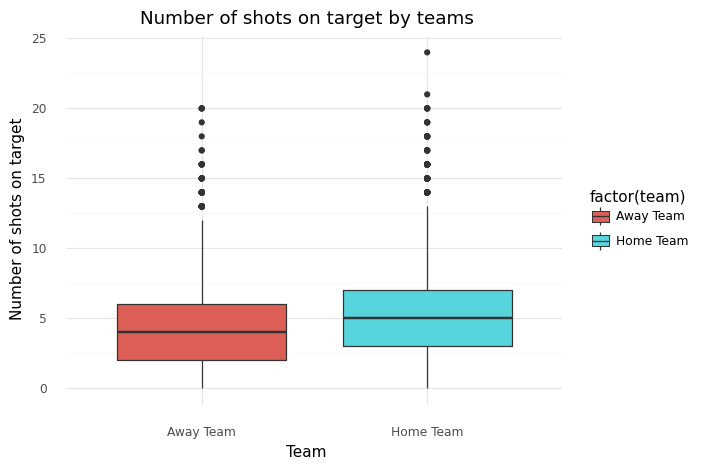

In [31]:
df = all_seasons[['HST','AST']]
st_df=pd.melt(df)
st_df.rename(columns = {'variable':'team'}, inplace = True)
st_df['team'] = st_df['team'].replace(['HST','AST'], ['Home Team','Away Team'])

print(
    ggplot(st_df, aes(x = 'team', y = 'value' , fill = 'factor(team)')) +
          geom_boxplot()+
          theme_minimal()+
          labs(title = 'Number of shots on target by teams', x = 'Team', y = 'Number of shots on target')
    )

In [32]:
st_df.groupby(by="team").describe()

value                                              
             count      mean       std  min  25%  50%  75%   max
team                                                            
Away Team  18149.0  4.219241  2.490943  0.0  2.0  4.0  6.0  20.0
Home Team  18149.0  5.194997  2.826195  0.0  3.0  5.0  7.0  24.0

Fouls

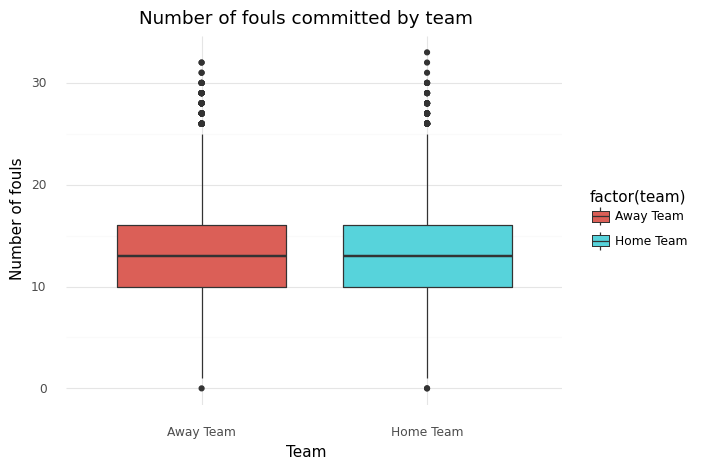

In [33]:
df = all_seasons[['HF','AF']]
fouls_df=pd.melt(df)
fouls_df.rename(columns = {'variable':'team'}, inplace = True)
fouls_df['team'] = fouls_df['team'].replace(['HF','AF'], ['Home Team','Away Team'])

print(
    ggplot(fouls_df, aes(x = 'team', y = 'value' , fill = 'factor(team)')) +
          geom_boxplot()+
          theme_minimal()+
          labs(title = 'Number of fouls committed by team', x = 'Team', y = 'Number of fouls')
    )

In [34]:
fouls_df.groupby(by="team").describe()

value                                                  
             count       mean       std  min   25%   50%   75%   max
team                                                                
Away Team  18149.0  13.190809  4.446931  0.0  10.0  13.0  16.0  32.0
Home Team  18149.0  12.876908  4.336676  0.0  10.0  13.0  16.0  33.0

Corner kicks

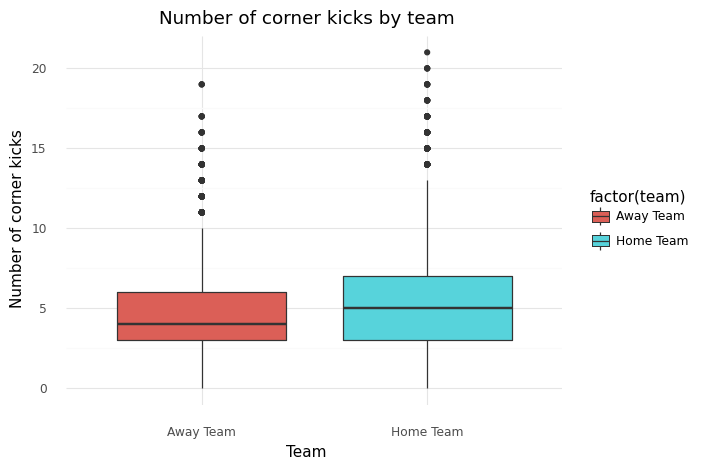

In [35]:
df = all_seasons[['HC','AC']]
corners_df=pd.melt(df)
corners_df.rename(columns = {'variable':'team'}, inplace = True)
corners_df['team'] = corners_df['team'].replace(['HC','AC'], ['Home Team','Away Team'])

print(
    ggplot(corners_df, aes(x = 'team', y = 'value' , fill = 'factor(team)')) +
          geom_boxplot()+
          theme_minimal()+
          labs(title = 'Number of corner kicks by team', x = 'Team', y = 'Number of corner kicks')
    )

In [36]:
corners_df.groupby(by="team").describe()

value                                              
             count      mean       std  min  25%  50%  75%   max
team                                                            
Away Team  18149.0  4.563392  2.634777  0.0  3.0  4.0  6.0  19.0
Home Team  18149.0  5.666869  3.015078  0.0  3.0  5.0  7.0  21.0

Yellow and Red Cards

In [37]:
df = all_seasons[['HY','AY']]
yell_cards_df=pd.melt(df)
yell_cards_df.rename(columns = {'variable':'team'}, inplace = True)
yell_cards_df['team'] = yell_cards_df['team'].replace(['HY','AY'], ['Home Team','Away Team'])

In [38]:
df = all_seasons[['HR','AR']]
red_cards_df=pd.melt(df)
red_cards_df.rename(columns = {'variable':'team'}, inplace = True)
red_cards_df['team'] = red_cards_df['team'].replace(['HR','AR'], ['Home Team','Away Team'])

<BarContainer object of 36298 artists>

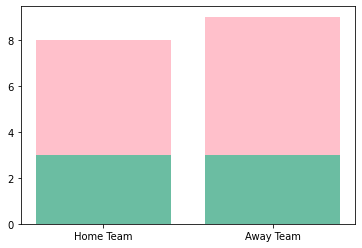

In [39]:
plt.bar(yell_cards_df['team'],yell_cards_df['value'],color = ['pink'])
plt.bar(red_cards_df['team'],red_cards_df['value'],color = ['#6BBDA2'])

In [40]:
yell_cards_df.where(yell_cards_df["team"]=="Home Team").describe()

,value
count,18149.000000
mean,1.912337
std,1.351811
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


In [41]:
yell_cards_df.where(yell_cards_df["team"]=="Away Team").describe()

,value
count,18149.000000
mean,2.169321
std,1.393937
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,9.000000


In [42]:
red_cards_df.where(red_cards_df["team"]=="Away Team").describe()

,value
count,18149.000000
mean,0.113009
std,0.338645
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


Total goals per match by league

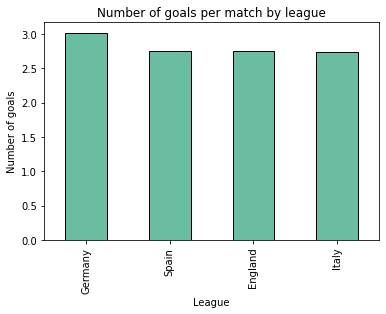

In [43]:
all_seasons['FTG_sum'] = all_seasons[list(['FTHG','FTAG'])].sum(axis=1)
df_ftg = all_seasons[['FTG_sum']].groupby(all_seasons['Div']).mean()
df_ftg = df_ftg.sort_values(by=['FTG_sum'], ascending=False).head(15)
df_ftg

all_seasons.FTG_sum.where(all_seasons["Div"]=="Germany").describe()
all_seasons.drop(['FTG_sum'], inplace=True, axis=1)

df_ftg.plot(kind='bar', edgecolor = 'black', color = '#6BBDA2', legend = None)
plt.title('Number of goals per match by league')
plt.ylabel('Number of goals')
plt.xlabel('League')
plt.show()

Total goals in first half of game by league

In [44]:
all_seasons['HTG_sum'] = all_seasons[list(['HTHG','HTAG'])].sum(axis=1)
df_htg = all_seasons[['HTG_sum']].groupby(all_seasons['Div']).mean()
df_htg = df_htg.sort_values(by=['HTG_sum'], ascending=False).head(15)
df_htg

,HTG_sum
Div,
Germany,1.334388
England,1.226925
Spain,1.213513
Italy,1.197308


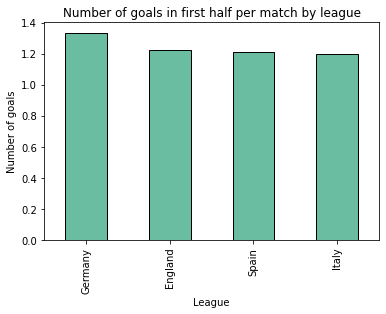

In [45]:
all_seasons.HTG_sum.describe()
all_seasons.drop(['HTG_sum'], inplace=True, axis=1)

df_htg.plot(kind='bar', edgecolor = 'black', color = '#6BBDA2', legend = None)
plt.title('Number of goals in first half per match by league')
plt.ylabel('Number of goals')
plt.xlabel('League')
plt.show()

The number of goals scored in matches by the home and away teams

In [46]:
all_seasons.FTHG.describe()

count    18149.000000
mean         1.584826
std          1.334976
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: FTHG, dtype: float64

In [47]:
all_seasons.FTAG.describe()

count    18149.000000
mean         1.234228
std          1.186752
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: FTAG, dtype: float64

In [48]:
df = all_seasons[['FTHG','FTAG']]
goals_df=pd.melt(df)
goals_df.rename(columns = {'variable':'team'}, inplace = True)
goals_df['team'] = goals_df['team'].replace(['FTHG','FTAG'], ['Home Team','Away Team'])
goals_df.head()

,team,value
0,Home Team,3.0
1,Home Team,1.0
2,Home Team,0.0
3,Home Team,6.0
4,Home Team,2.0


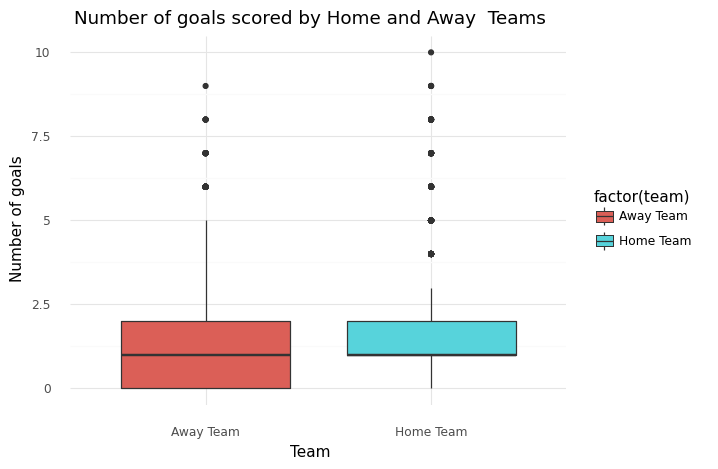

In [49]:
df = all_seasons[['FTHG','FTAG']]
goals_df=pd.melt(df)
goals_df.rename(columns = {'variable':'team'}, inplace = True)
goals_df['team'] = fouls_df['team'].replace(['FTHG','FTAG'], ['Home Team','Away Team'])

print(
    ggplot(goals_df, aes(x = 'team', y = 'value' , fill = 'factor(team)')) +
          geom_boxplot()+
          theme_minimal()+
          labs(title = 'Number of goals scored by Home and Away  Teams', x = 'Team', y = 'Number of goals')
    )

Bookmaker odds variables

In [50]:
all_seasons.AvgH.describe()

count    18149.000000
mean         2.781486
std          2.048291
min          1.033333
25%          1.670000
50%          2.172857
75%          2.990000
max         28.154286
Name: AvgH, dtype: float64

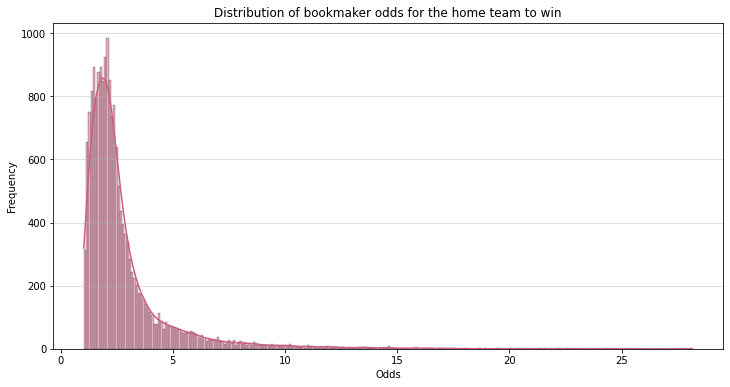

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(data=all_seasons, x='AvgH', kde=True, color='#CD5E7D')

plt.title('Distribution of bookmaker odds for the home team to win')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [52]:
all_seasons.AvgA.describe()

count    18149.000000
mean         4.695559
std          4.162458
min          1.090000
25%          2.400000
50%          3.398571
75%          5.210000
max         42.338333
Name: AvgA, dtype: float64

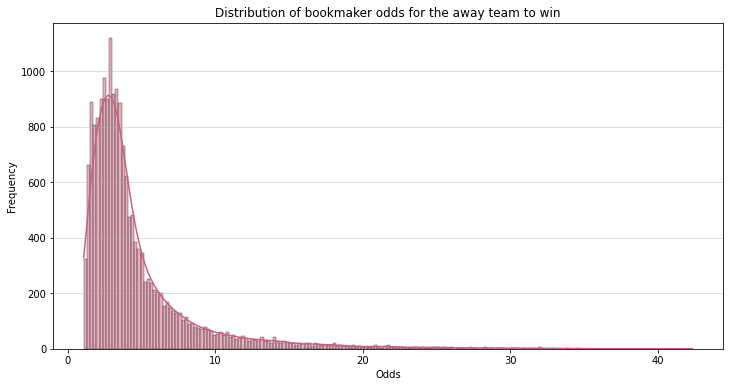

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data=all_seasons, x='AvgA', kde=True, color='#CD5E7D')

plt.title('Distribution of bookmaker odds for the away team to win')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [54]:
all_seasons.AvgD.describe()

count    18149.000000
mean         4.065549
std          1.336202
min          1.400000
25%          3.340000
50%          3.583750
75%          4.210000
max         19.142500
Name: AvgD, dtype: float64

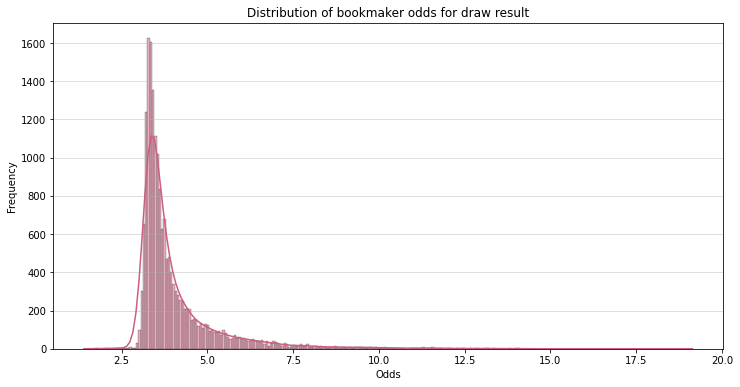

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(data=all_seasons, x='AvgD', kde=True, color='#CD5E7D')

plt.title('Distribution of bookmaker odds for draw result')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [56]:
all_seasons['Avg>2.5'].describe()

count    18149.000000
mean         1.824523
std          0.283532
min          0.420000
25%          1.620000
50%          1.810000
75%          2.030000
max          2.910000
Name: Avg>2.5, dtype: float64

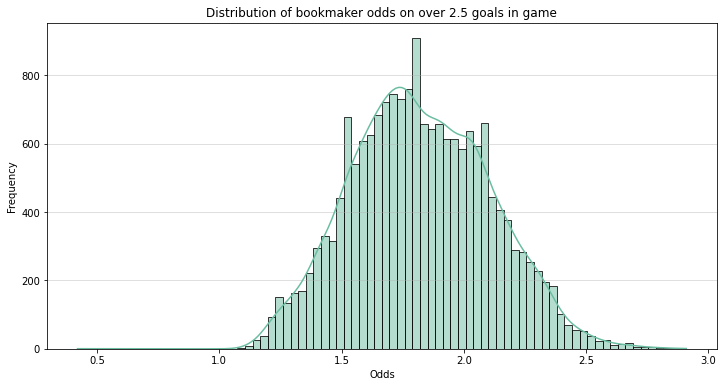

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(data=all_seasons, x='Avg>2.5', kde=True, color='#6BBDA2')

plt.title('Distribution of bookmaker odds on over 2.5 goals in game')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [58]:
all_seasons['Avg<2.5'].describe()

count    18149.000000
mean         2.104208
std          0.488928
min          1.380000
25%          1.780000
50%          1.990000
75%          2.270000
max          6.750000
Name: Avg<2.5, dtype: float64

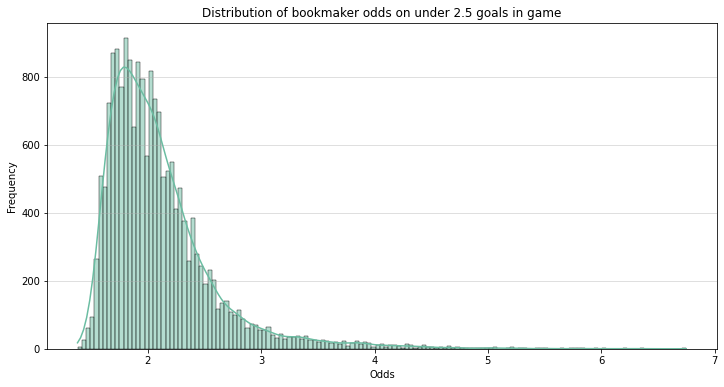

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data=all_seasons, x='Avg<2.5', kde=True, color='#6BBDA2')

plt.title('Distribution of bookmaker odds on under 2.5 goals in game')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Model building**

Selection of variables and split of the set

Correlation Matrix

<AxesSubplot:>

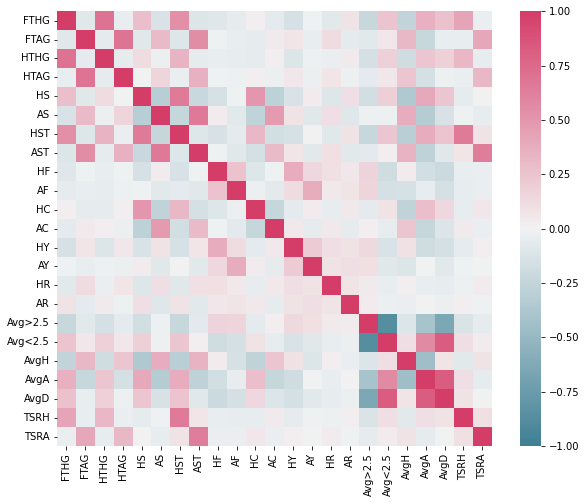

In [61]:
f, ax = plt.subplots(figsize=(10, 8))
corr = all_seasons.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220,360, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [63]:
X = all_seasons[['HTHG','HTAG','HS','AS','HST','HF','AF','HC','AC','HY','AY','HR','AR','AvgH','Avg>2.5', 'TSRA']]
y = all_seasons[['FTR']]

<AxesSubplot:>

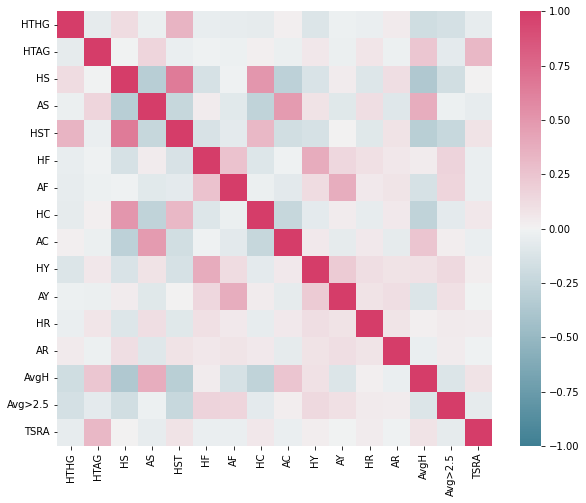

In [64]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220,360, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Splitting data into train and test datasets

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12704 entries, 29 to 200
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HTHG     12704 non-null  float64
 1   HTAG     12704 non-null  float64
 2   HS       12704 non-null  float64
 3   AS       12704 non-null  float64
 4   HST      12704 non-null  float64
 5   HF       12704 non-null  float64
 6   AF       12704 non-null  float64
 7   HC       12704 non-null  float64
 8   AC       12704 non-null  float64
 9   HY       12704 non-null  float64
 10  AY       12704 non-null  float64
 11  HR       12704 non-null  float64
 12  AR       12704 non-null  float64
 13  AvgH     12704 non-null  float64
 14  Avg>2.5  12704 non-null  float64
 15  TSRA     12704 non-null  float64
dtypes: float64(16)
memory usage: 1.6 MB


In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445 entries, 360 to 245
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HTHG     5445 non-null   float64
 1   HTAG     5445 non-null   float64
 2   HS       5445 non-null   float64
 3   AS       5445 non-null   float64
 4   HST      5445 non-null   float64
 5   HF       5445 non-null   float64
 6   AF       5445 non-null   float64
 7   HC       5445 non-null   float64
 8   AC       5445 non-null   float64
 9   HY       5445 non-null   float64
 10  AY       5445 non-null   float64
 11  HR       5445 non-null   float64
 12  AR       5445 non-null   float64
 13  AvgH     5445 non-null   float64
 14  Avg>2.5  5445 non-null   float64
 15  TSRA     5445 non-null   float64
dtypes: float64(16)
memory usage: 723.2 KB
